<a href="https://colab.research.google.com/github/sekhar70136/eda-project1/blob/main/Another_copy_of_Eda_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("/content/manufacturing_sensors_regression.csv")
print(df)



    temp_c  rpm_dup  maintenance_required  vibration     rpm operator_shift  \
0    54.63   2256.0                   0.0      0.224  2256.0              C   
1     60.4   2844.0                   0.0      0.319  2844.0              A   
2    66.68   3751.0                   0.0      0.338  3751.0              A   
3     58.8   1000.0                   0.0      0.320  1000.0              C   
4    66.27   4576.0                   0.0      0.482  4576.0              B   
..     ...      ...                   ...        ...     ...            ...   
252  57.26   4780.0                   0.0      0.197  4780.0              B   
253  57.74   2258.0                   0.0      0.441  2258.0              C   
254  63.72      NaN                   NaN      0.515     NaN              B   
255  63.65   3985.0                   0.0      0.541  3985.0              C   
256  65.87   3169.0                   0.0      0.576  3169.0              A   

     pressure sensor_id  machine_age_days  
0      

In [ ]:
print(df.isna().sum())



temp_c                  13
rpm_dup                 18
maintenance_required    20
vibration               12
rpm                     18
operator_shift          14
pressure                20
sensor_id               19
machine_age_days        12
dtype: int64


In [ ]:
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df.isna().sum())



temp_c                  0
rpm_dup                 0
maintenance_required    0
vibration               0
rpm                     0
operator_shift          0
pressure                0
sensor_id               0
machine_age_days        0
dtype: int64


/tmp/ipython-input-3875771179.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3875771179.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:

    if df[col].nunique() <= 2:

        df[col] = df[col].apply(lambda x: 1 if x >= 1 else 0)

        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    mask = (df[col] < lower) | (df[col] > upper)
    n = mask.sum()

    if n > 0:
        df.loc[mask, col] = median
        print(f"Replaced {n} outlier(s) in '{col}' with median = {median}")



Replaced 1 outlier(s) in 'temp_c' with median = 60.14
Replaced 32 outlier(s) in 'maintenance_required' with median = 0.0
Replaced 3 outlier(s) in 'vibration' with median = 0.5001428571428571
Replaced 3 outlier(s) in 'pressure' with median = 29.963670886075946


In [ ]:

df.to_csv("manufacturing_sensors_cleaned_final.csv", index=False)




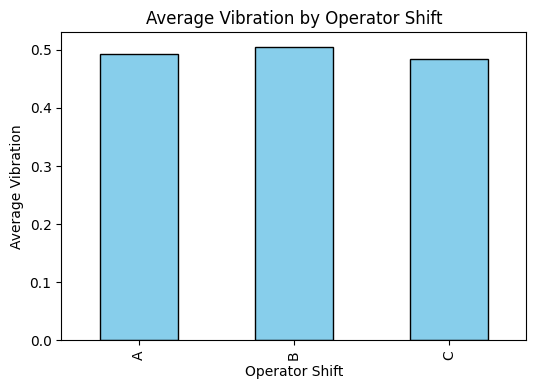

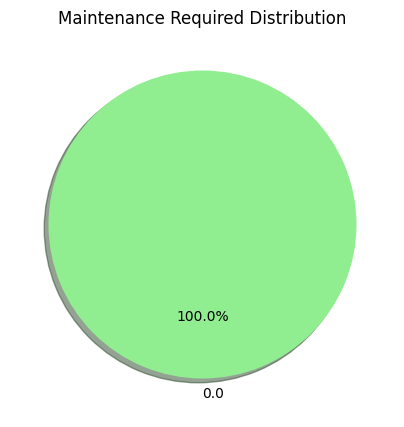

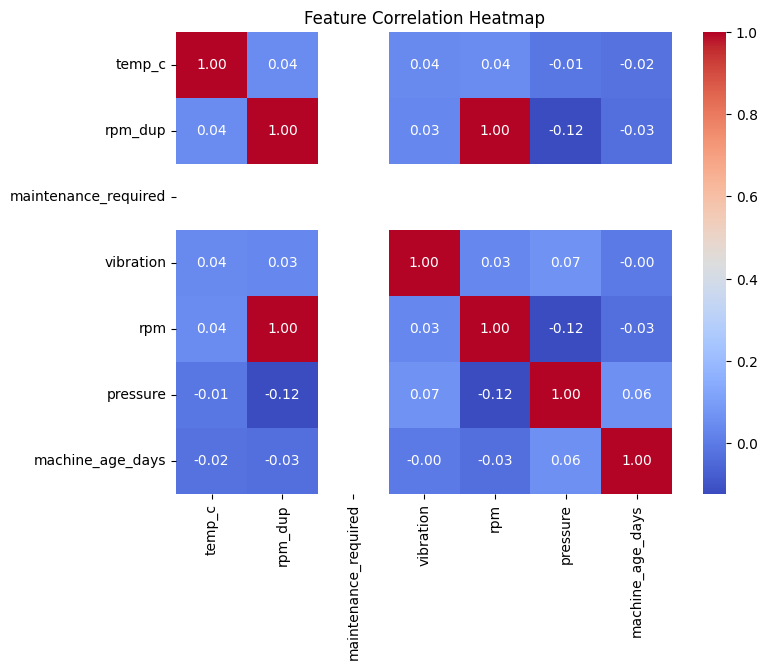

<Figure size 800x500 with 0 Axes>

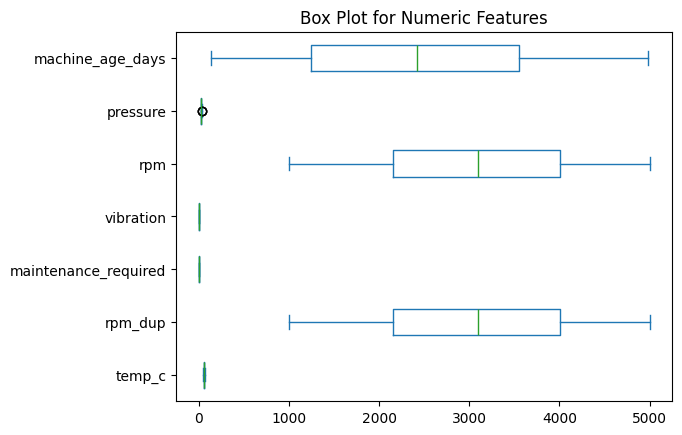

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



if 'operator_shift' in df.columns and 'vibration' in df.columns:
    plt.figure(figsize=(6,4))
    df.groupby('operator_shift')['vibration'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Vibration by Operator Shift')
    plt.xlabel('Operator Shift')
    plt.ylabel('Average Vibration')
    plt.show()
else:
    print("Columns 'operator_shift' or 'vibration' missing.")

if 'maintenance_required' in df.columns:
    plt.figure(figsize=(5,5))
    df['maintenance_required'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90, shadow=True)
    plt.title('Maintenance Required Distribution')
    plt.ylabel('')
    plt.show()
else:
    print("Column 'maintenance_required' missing.")

num_cols = df.select_dtypes(include=['float64', 'int64'])
if not num_cols.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns for heatmap.")

if not num_cols.empty:
    plt.figure(figsize=(8,5))
    num_cols.plot(kind='box', vert=False)
    plt.title('Box Plot for Numeric Features')
    plt.show()
else:
    print("No numeric columns for box plot.")
